#### color as unique colors

In [1]:
import pandas as pd
import numpy as np
import umap
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
import hdbscan

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [4]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

pal = sns.color_palette('Set1', 3)
custommap = ListedColormap([
    list(pal[0])+[1],
    list(pal[1])+[1],
    list(pal[2])+[1],
], name='custommap')

In [5]:
pal = sns.color_palette("Dark2", 3)
darkmmap = ListedColormap([
    list(pal[1])+[1],
    list(pal[2])+[1],
], name='custommap')


In [6]:
pal = sns.color_palette('Set1', 3)
greymap = ListedColormap([
    [0,0,0,1],
], name='greymap')

In [7]:
point_df = pd.read_pickle('point_df.pickle')
point_df["label"] = np.random.permutation(np.arange(0,20))
point_df[:3]

,data_,embedding,label,spectral_embedding,random_embedding
0,"[-0.05812716910083182, 4.13056997182554, -4.25...","[-0.6344973, 7.345195]",7,"[0.5911517811478506, -0.008832536128889757]","[0.8012730174926173, 0.4181146018414298]"
1,"[-3.359090593844753, 6.596416658084696, -8.878...","[0.5659561, 7.679983]",0,"[0.9150689049483262, -0.08201851022513977]","[0.1839182266849685, 0.8222152743104965]"
2,"[-7.067464840991654, -10.093321663983687, -11....","[-4.5785413, 5.883973]",2,"[-0.5792991372167784, -0.7744489820127733]","[0.9097859226100449, 0.04633064990967861]"


In [8]:
cluster_id = point_df.label.values
points = np.vstack(point_df.embedding.values)

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(points)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
        prediction_data=False)

In [10]:
clusterer.labels_

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [11]:
edge_df = pd.DataFrame(clusterer.minimum_spanning_tree_._mst, columns = ["source", "target", "weight"])
edge_df['norm_weight'] = 2 * (np.log(edge_df.weight.max() /edge_df.weight.values) + 1.0)
edge_df['norm_weight2'] = 1-np.log(1+edge_df.weight / edge_df.weight.max())
edge_df[:3]

,source,target,weight,norm_weight,norm_weight2
0,3.0,6.0,0.790078,5.118869,0.809169
1,7.0,6.0,0.790078,5.118869,0.809169
2,3.0,10.0,0.790078,5.118869,0.809169


In [12]:
### Plotting

In [13]:
node_size = 100
cmap = plt.cm.tab20#custommap # plt.cm.tab20c# plt.cm.brg # plt.cm.Dark2
padding = 0.05

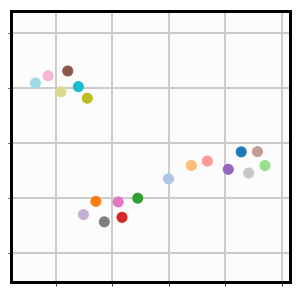

In [14]:
fig = plt.figure(figsize=(5,5))

ax  = fig.add_subplot(1,1,1,)
ax.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_facecolor((0,0,0,0.01))

ax.scatter(points[:,0], points[:,1], c=cluster_id, cmap = cmap, s=node_size, zorder = 100)

[i.set_linewidth(3) for i in ax.spines.values()]

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax.set_ylim(new_ylim)
ax.set_xlim(new_xlim)

ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_color', dpi=300, save_pdf=True)

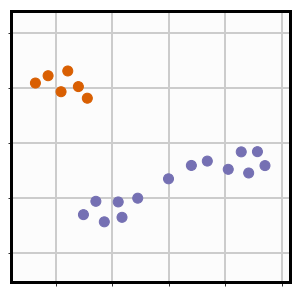

In [15]:
fig = plt.figure(figsize=(5,5))

ax  = fig.add_subplot(1,1,1,)
ax.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_facecolor((0,0,0,0.01))
ax.scatter(points[:,0], points[:,1], c=clusterer.labels_, cmap = darkmmap, s=node_size, zorder = 100)

[i.set_linewidth(3) for i in ax.spines.values()]

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax.set_ylim(new_ylim)
ax.set_xlim(new_xlim)

ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_labelled', dpi=300, save_pdf=True)

In [16]:
edge_df[:3]

,source,target,weight,norm_weight,norm_weight2
0,3.0,6.0,0.790078,5.118869,0.809169
1,7.0,6.0,0.790078,5.118869,0.809169
2,3.0,10.0,0.790078,5.118869,0.809169


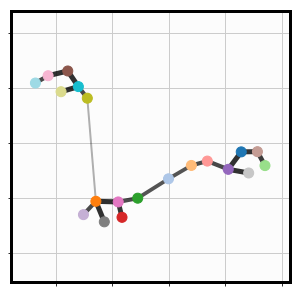

In [17]:
fig = plt.figure(figsize=(5,5))

ax  = fig.add_subplot(1,1,1,)
ax.grid(b=True, which='major', color='#CCCCCC', linewidth=1, linestyle='-', zorder = -100)
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_facecolor((0,0,0,0.01))

ax.scatter(points[:,0], points[:,1], c=cluster_id, cmap = cmap, s=node_size, zorder = 100)

for idx, row in tqdm(edge_df.iterrows(), total=len(edge_df), leave=False):
    st = point_df.iloc[int(row.source)].embedding
    ed = point_df.iloc[int(row.target)].embedding
    ax.plot([st[0], ed[0]], [st[1], ed[1]], alpha =row.norm_weight2, color= 'black', lw=row.norm_weight)
    
[i.set_linewidth(3) for i in ax.spines.values()]
ax.set_xticklabels([]); ax.set_yticklabels([]); 


ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax.set_ylim(new_ylim)
ax.set_xlim(new_xlim)

ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_mst', dpi=300, save_pdf=True)

In [18]:
from scipy.cluster.hierarchy import dendrogram

In [19]:
dendrogram_data = dendrogram(clusterer.single_linkage_tree_._linkage, p=0, truncate_mode=None, no_plot=True, );

X = dendrogram_data['icoord']
Y = dendrogram_data['dcoord']
XLOCS = np.sort(np.array(X)[np.array(Y) == 0])

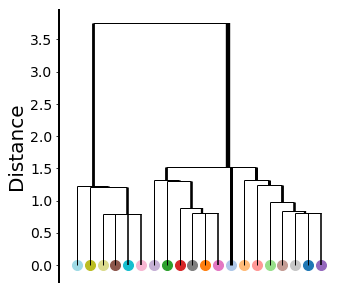

In [20]:
pal = sns.color_palette('tab20', 20)
fig, ax = plt.subplots(figsize=(5,5))

clusterer.single_linkage_tree_.plot(axis = ax, cmap=greymap, vary_line_width=True, colorbar=False) # cmap='plasma'
ax.set_ylabel('Distance', fontsize=20)
ax.spines['left'].set_linewidth(2)
ax.yaxis.set_tick_params(labelsize=14)

for lf, x in zip(dendrogram_data['leaves'], XLOCS):
    y = 0
    color = pal[point_df['label'].values[lf]]
    ax.scatter([x], [y], color=color,  s= 100, zorder=-10000)    


ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_slt', dpi=300, save_pdf=True)
plt.show()

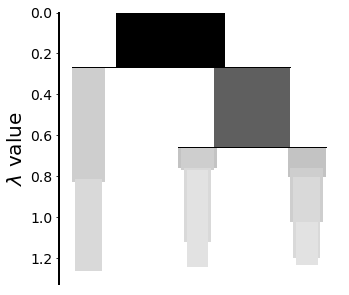

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax = clusterer.condensed_tree_.plot(
    axis = ax, 
    cmap = plt.cm.Greys,
    log_size=False,
    select_clusters=False,
    label_clusters=False,
    colorbar=False
)
ax.set_ylabel('$\lambda$ value', fontsize=20)
ax.spines['left'].set_linewidth(2)
ax.yaxis.set_tick_params(labelsize=14)
#plt.colorbar(sm)

ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_condensed', dpi=300, save_pdf=True)

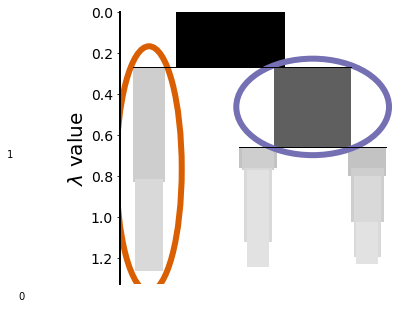

In [22]:
selection_palette = sns.color_palette("Dark2", 3)[1:] #plt.cm.PiYG #sns.color_palette()
from matplotlib.patches import Ellipse

CB_LEFT = 0
CB_RIGHT = 1
CB_BOTTOM = 2
CB_TOP = 3
leaf_separation=1
log_size=False
max_rectangles_per_icicle=20
cmap = plt.cm.Greys

fig, ax = plt.subplots(figsize=(5,5))

plot_data = clusterer.condensed_tree_.get_plot_data(leaf_separation=leaf_separation,
                                       log_size=log_size,
                                       max_rectangle_per_icicle=max_rectangles_per_icicle)
sm = plt.cm.ScalarMappable(cmap=cmap,
                                       norm=plt.Normalize(0, max(plot_data['bar_widths'])))
sm.set_array(plot_data['bar_widths'])
bar_colors = [sm.to_rgba(x) for x in plot_data['bar_widths']]

ax.bar(
    plot_data['bar_centers'],
    plot_data['bar_tops'],
    bottom=plot_data['bar_bottoms'],
    width=plot_data['bar_widths'],
    color=bar_colors,
    align='center',
    linewidth=0
)

drawlines = []
for xs, ys in zip(plot_data['line_xs'], plot_data['line_ys']):
    drawlines.append(xs)
    drawlines.append(ys)
ax.plot(*drawlines, color='black', linewidth=1)


# invert axis
ax.set_xticks([])
for side in ('right', 'top', 'bottom'):
    ax.spines[side].set_visible(False)
ax.invert_yaxis()
ax.set_ylabel('$\lambda$ value', fontsize=20)

# colorbar
#cb = plt.colorbar(sm)
#cb.ax.set_ylabel('Number of points', fontsize=20)
#cb.ax.yaxis.set_tick_params(labelsize=14)

ax.spines['left'].set_linewidth(2)
ax.yaxis.set_tick_params(labelsize=14)


chosen_clusters = clusterer.condensed_tree_._select_clusters()
            
# Extract the chosen cluster bounds. If enough duplicate data points exist in the
# data the lambda value might be infinite. This breaks labeling and highlighting
# the chosen clusters.
cluster_bounds = np.array([ plot_data['cluster_bounds'][c] for c in chosen_clusters ])
if not np.isfinite(cluster_bounds).all():
    warn('Infinite lambda values encountered in chosen clusters.'
         ' This might be due to duplicates in the data.')

# Extract the plot range of the y-axis and set default center and height values for ellipses.
# Extremly dense clusters might result in near infinite lambda values. Setting max_height
# based on the percentile should alleviate the impact on plotting.
plot_range = np.hstack([plot_data['bar_tops'], plot_data['bar_bottoms']])
plot_range = plot_range[np.isfinite(plot_range)]
mean_y_center = np.mean([np.max(plot_range), np.min(plot_range)])
max_height = np.diff(np.percentile(plot_range, q=[10,90]))

for i, c in enumerate(chosen_clusters):
    c_bounds = plot_data['cluster_bounds'][c]
    width = (c_bounds[CB_RIGHT] - c_bounds[CB_LEFT])
    height = (c_bounds[CB_TOP] - c_bounds[CB_BOTTOM])
    center = (
        np.mean([c_bounds[CB_LEFT], c_bounds[CB_RIGHT]]),
        np.mean([c_bounds[CB_TOP], c_bounds[CB_BOTTOM]]),
    )

    # Set center and height to default values if necessary
    if not np.isfinite(center[1]):
        center = (center[0], mean_y_center)
    if not np.isfinite(height):
        height = max_height

    # Ensure the ellipse is visible
    min_height = 0.1*max_height
    if height < min_height:
        height = min_height

    if selection_palette is not None and \
            len(selection_palette) >= len(chosen_clusters):
        oval_color = selection_palette[i]
    else:
        oval_color = 'r'

    box = Ellipse(
        center,
        2.0 * width,
        1.2 * height,
        facecolor='none',
        edgecolor=oval_color,
        linewidth=6
    )

    ax.annotate(str(i), xy=center,
                  xytext=(center[0] - 4.0 * width, center[1] + 0.65 * height),
                  horizontalalignment='left',
                  verticalalignment='bottom')

    ax.add_artist(box)

ensure_dir(FIGURE_DIR / 'hdbscan_example')
save_fig(FIGURE_DIR / 'hdbscan_example' / 'points_clustered', dpi=300, save_pdf=True)